In [992]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [993]:
df= pd.read_csv("../../data/processed/oline_merge.csv")

In [994]:
df = df[df.year < 2020]
df = df[df.year >= df.draft_yr + 3]

In [995]:
df.dtypes

Unnamed: 0                    int64
Unnamed: 0.1                  int64
year                          int64
playername                   object
team                         object
age                           int64
draft_yr                      int64
draft_pos                     int64
attempts                      int64
yards_run                     int64
tds_run                       int64
longgain_run                  int64
yardsperatt                 float64
yardspergame_run            float64
basesalarycap (10^8)        float64
Percenthit (%)              float64
caphit (M)                  float64
cashspent (M)               float64
g                             int64
gs                            int64
tgt                           int64
rec                           int64
catchpercent                 object
yards_rec                     int64
yardsperrec                 float64
tds_rec                       int64
firstdowns                    int64
longgain_rec                

In [996]:
df = df.drop('year',axis=1)
df = df.drop('playername',axis=1)
df = df.drop('team',axis=1)
df = df.drop('basesalarycap (10^8)',axis=1)
df = df.drop('cashspent (M)',axis=1)
df = df.drop('caphit (M)',axis=1)
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('Unnamed: 0.1',axis=1)
df = df.drop('catchpercent',axis=1)
df = df.drop('draft_yr',axis=1)

In [997]:
len(df.dtypes)

25

# Splitting & Scaling

In [998]:
from sklearn.model_selection import train_test_split
X = df.drop('Percenthit (%)',axis=1).values
y = df['Percenthit (%)'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [999]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

# Model

In [1000]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [1001]:
len(X_test[1])

24

In [1002]:
X_train.shape
model = Sequential()

model.add(Dense(24, activation="relu"))
model.add(Dense(17, activation="relu"))
model.add(Dense(17, activation="relu"))
model.add(Dense(1))

model.compile(optimizer="adam", loss="mae")
model.fit(x=X_train, y= y_train, validation_data=(X_test,y_test),batch_size=128,epochs=250)

Epoch 1/250
2/2 [==============================] - 0s 43ms/step - loss: 2.7757 - val_loss: 2.4051
Epoch 2/250
2/2 [==============================] - 0s 10ms/step - loss: 2.7419 - val_loss: 2.3748
Epoch 3/250
2/2 [==============================] - 0s 9ms/step - loss: 2.7077 - val_loss: 2.3444
Epoch 4/250
2/2 [==============================] - 0s 10ms/step - loss: 2.6738 - val_loss: 2.3133
Epoch 5/250
2/2 [==============================] - 0s 11ms/step - loss: 2.6384 - val_loss: 2.2801
Epoch 6/250
2/2 [==============================] - 0s 9ms/step - loss: 2.6028 - val_loss: 2.2422
Epoch 7/250
2/2 [==============================] - 0s 9ms/step - loss: 2.5646 - val_loss: 2.2013
Epoch 8/250
2/2 [==============================] - 0s 10ms/step - loss: 2.5258 - val_loss: 2.1576
Epoch 9/250
2/2 [==============================] - 0s 10ms/step - loss: 2.4823 - val_loss: 2.1100
Epoch 10/250
2/2 [==============================] - 0s 8ms/step - loss: 2.4367 - val_loss: 2.0583
Epoch 11/250
2/2 [=====

2/2 [==============================] - 0s 11ms/step - loss: 1.4079 - val_loss: 1.2573
Epoch 85/250
2/2 [==============================] - 0s 11ms/step - loss: 1.4065 - val_loss: 1.2580
Epoch 86/250
2/2 [==============================] - 0s 11ms/step - loss: 1.4055 - val_loss: 1.2654
Epoch 87/250
2/2 [==============================] - 0s 9ms/step - loss: 1.4013 - val_loss: 1.2664
Epoch 88/250
2/2 [==============================] - 0s 10ms/step - loss: 1.4000 - val_loss: 1.2691
Epoch 89/250
2/2 [==============================] - 0s 10ms/step - loss: 1.3983 - val_loss: 1.2731
Epoch 90/250
2/2 [==============================] - 0s 9ms/step - loss: 1.3963 - val_loss: 1.2696
Epoch 91/250
2/2 [==============================] - 0s 9ms/step - loss: 1.3932 - val_loss: 1.2707
Epoch 92/250
2/2 [==============================] - 0s 10ms/step - loss: 1.3916 - val_loss: 1.2687
Epoch 93/250
2/2 [==============================] - 0s 10ms/step - loss: 1.3893 - val_loss: 1.2648
Epoch 94/250
2/2 [========

2/2 [==============================] - 0s 11ms/step - loss: 1.2817 - val_loss: 1.2793
Epoch 167/250
2/2 [==============================] - 0s 10ms/step - loss: 1.2799 - val_loss: 1.2801
Epoch 168/250
2/2 [==============================] - 0s 9ms/step - loss: 1.2790 - val_loss: 1.2813
Epoch 169/250
2/2 [==============================] - 0s 9ms/step - loss: 1.2773 - val_loss: 1.2819
Epoch 170/250
2/2 [==============================] - 0s 9ms/step - loss: 1.2760 - val_loss: 1.2827
Epoch 171/250
2/2 [==============================] - 0s 9ms/step - loss: 1.2743 - val_loss: 1.2809
Epoch 172/250
2/2 [==============================] - 0s 9ms/step - loss: 1.2717 - val_loss: 1.2789
Epoch 173/250
2/2 [==============================] - 0s 8ms/step - loss: 1.2730 - val_loss: 1.2801
Epoch 174/250
2/2 [==============================] - 0s 9ms/step - loss: 1.2710 - val_loss: 1.2832
Epoch 175/250
2/2 [==============================] - 0s 9ms/step - loss: 1.2679 - val_loss: 1.2829
Epoch 176/250
2/2 [===

2/2 [==============================] - 0s 10ms/step - loss: 1.1464 - val_loss: 1.3106
Epoch 249/250
2/2 [==============================] - 0s 10ms/step - loss: 1.1458 - val_loss: 1.3095
Epoch 250/250
2/2 [==============================] - 0s 9ms/step - loss: 1.1412 - val_loss: 1.3209


MSE:  3.1332433651447555
RMSE:  1.7700969931460693
MAE:  1.3209143881865617
ESV:  0.31695365274911913


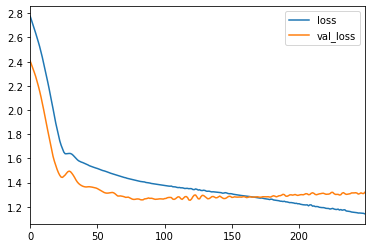

In [1003]:
losses = pd.DataFrame(model.history.history)
losses.plot()

from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score
predictions = model.predict(X_test)

print("MSE: ",mean_squared_error(y_test,predictions) )
print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
print("MAE: ",mean_absolute_error(y_test,predictions) )
print("ESV: ", explained_variance_score(y_test, predictions))

In [1004]:
#model.save('dnn')

In [1005]:
#loaded_model = tf.keras.models.load_model('dnn')

In [1006]:
# predictions = loaded_model.predict(X_test)
# print("MSE: ",mean_squared_error(y_test,predictions) )
# print("RMSE: ",np.sqrt(mean_squared_error(y_test,predictions)) )
# print("MAE: ",mean_absolute_error(y_test,predictions) )
# print("ESV: ", explained_variance_score(y_test, predictions))